Lagrange Polynomial
========

# Theory
**Lagrange Polynomial (LP)** is interpolating polynomial, it is wellknown for its intuitive and simple construction. It is considered the simplest representation, among all the possible representations; of the original function

## Definition
The **LP** is constructed through weighted sum of bases functions. The bases are constructed based on the following rule, *each basis has to have value of 1 at exactly one collocation point, and 0 at all others*. Lagrange proposed a construction of basis function that satisfy this rule. Lets say we have four collocation points $N=4$, then the Lagrange basis for point $(x_0, y_0)$ is
$$
\begin{equation*}
l_0 = \frac{(x - x_1)(x - x_2)(x - x_3)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)}
\end{equation*}$$

We can see that the basis $l_0$ is 1 at $x =x_0$ and 0 at the rest. Hence a general formulation of the bases functions is the following
$$
\begin{equation}
L(x) = \sum_{i = 1}^n y_i l_i(x)
\end{equation}$$

And then the **Lagrange Polynomial (LP)** can be constructed as following
$$
\begin{equation}
l_i(x) = \prod_{\substack{j = 1\\ j\ne i}}^n\frac{(x - x_j)}{(x_i - x_j)}   \qquad i = 0,1,2, \cdots,N
\end{equation}$$

**Lagrange Polynomial (LP)** is of order $(N-1)$, since it passes through $N$ collocation points. **LP** can be see a the polynomial of the lowest degree degree that would interpolates a set of points.


## Examples
Give a set of collocation points where $N=3$. Derive the lagrange polynomial interpolation through these set of points.
|0      | 1      | 2     |
|-      |-       |-      |
|$(1,\; 1)$|$(2,\; 2)$ |$(3,\; 3)$|

$$
\begin{align*}
l_0 &= \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} = \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} \\[10pt]
l_1 &= \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} = \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} \\[10pt]
l_2 &= \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} = \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)} \\[10pt]
\end{align*}$$
Hence the lagrange polynomial
$$
\begin{align*}
L(x) = \sum_{i = 1}^n y_i l_i(x) = 1 \cdot \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} + 2 \cdot \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} + 3 \cdot \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)}
\end{align*}$$


# Implementation
Our representation of the set of collocation points will be through the use of `numpy` vector that holds in each row a `x` and `y` values "aka the input values and its evaluation by the unknown function"

$$
\begin{bmatrix}
    x_1     &  y_1      \\
                        \\
    \vdots  &  \vdots   \\
                        \\
    x_N     &  y_N      \\      
\end{bmatrix}
$$

$
\text{where} \\
\begin{array}{l l}
    \qquad x, \; y &: \text{Input value and its evaluation by the unknown function, respectively}\\
    \qquad N &: \text{Number of collocation points}
\end{array}
$

Moreover the points will be sampled from an analytical function that we define. We do this so we can better compare the lagrange polynomial approximation with the original function.

## Imports

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [2]:
N = 4                      # number of collocation points
a, b = [-5,5]              # interpolation interval
f = lambda x : np.sin(x)   # function to sample points from

## Algorithm

```mermaid
    flowchart LR
        get_args(Get collocation points) --> l_i(Construct each basis function l_i)
        l_i -->|"iterative multiplication of (x - x_j)/(x_i - x_j)"| l_i
        l_i --> l(Store basis l_i) 
        l_i --> f(Construct the lagrange polynomial f through weighted bases)
        f -->|"iterative addition  of y_i*l_i"| f
```

In [3]:
def LP(points: list[float, float]) -> tuple[Callable, list[Callable]]:
    '''
    Construct the lagrange polynomial approximation through given set of collocation points

    Args:
        points: Collocation points

    Returns:
        The lagrange polynomial approximation and its bases
    '''

    bases = []
    L = 0
    for x_i, y_i in points:
        l_i = 1
        for x_j, _ in points:
            if x_i == x_j:
                continue
            
            l_i *= ((x - x_j)/(x_i - x_j))

        bases.append(sp.lambdify(x, l_i))
        L += y_i*l_i
    
    return sp.lambdify(x, L), bases

In [4]:
# sample the collocation points
xx = np.linspace(a, b, num=N)
points = np.stack((xx, f(xx)), axis=-1)

# get 
L, bases = LP(points)

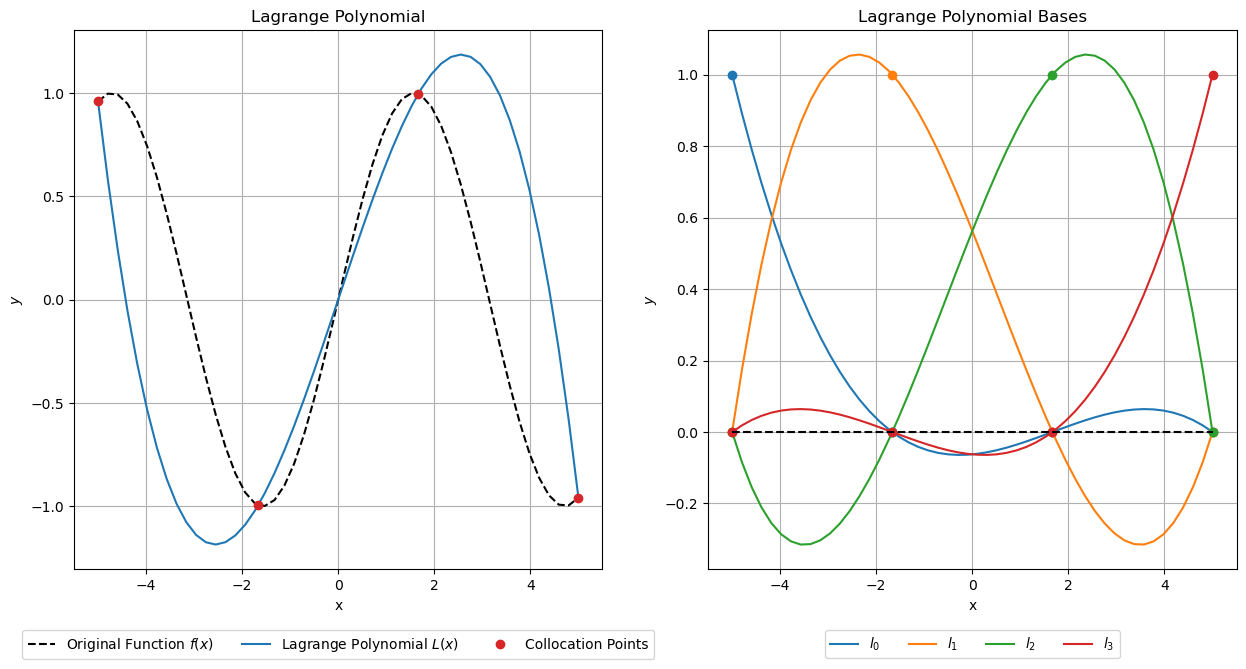

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# fine domain and collocation points
domain = np.linspace(a, b) 
x_values, y_values = points[:,0], points[:,1]

# func plot
ax[0].plot(domain, f(domain), "k--", label="Original Function $f(x)$")

# lagrange polynomial plot
ax[0].plot(domain, L(domain), color="tab:blue", label="Lagrange Polynomial $L(x)$")
ax[0].set(xlabel="x", ylabel=r"$y$", title="Lagrange Polynomial")
ax[0].plot(x_values, y_values, "o", color="tab:red", label= "Collocation Points")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
ax[0].grid(True)

# bases functions plot
for i, basis in enumerate(bases):
    color = next(ax[1]._get_lines.prop_cycler)['color']
    ax[1].plot(domain, basis(domain), color=color, label=f"$l_{i}$")
    ax[1].plot(x_values, basis(x_values), "o", color=color)
ax[1].plot(domain, np.zeros_like(domain), "k--")
ax[1].set(xlabel="x", ylabel=r"$y$", title="Lagrange Polynomial Bases")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(bases))
ax[1].grid(True)
